# Prevendo Customer Churn em Operadoras de Telecom
## Leonara Alves

In [2]:
# Leitura de Pacotes
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler      # escala
from sklearn.preprocessing import StandardScaler    # padronização
from sklearn.ensemble import ExtraTreesClassifier   # feature selection
from imblearn.over_sampling import SMOTE            # balanceamento dos dados
%matplotlib inline

In [3]:
# Lendo a base de dados
dataset_train = pd.read_csv("projeto4_telecom_treino.csv", index_col = "Unnamed: 0")
dataset_test = pd.read_csv("projeto4_telecom_teste.csv", index_col = "Unnamed: 0")

In [4]:
# Visualização dos dados
dataset_train.head(10)

state  account_length      area_code international_plan voice_mail_plan  \
1     KS             128  area_code_415                 no             yes   
2     OH             107  area_code_415                 no             yes   
3     NJ             137  area_code_415                 no              no   
4     OH              84  area_code_408                yes              no   
5     OK              75  area_code_415                yes              no   
6     AL             118  area_code_510                yes              no   
7     MA             121  area_code_510                 no             yes   
8     MO             147  area_code_415                yes              no   
9     LA             117  area_code_408                 no              no   
10    WV             141  area_code_415                yes             yes   

    number_vmail_messages  total_day_minutes  total_day_calls  \
1                      25              265.1              110   
2                      26              161.6              123   
3                       0              243.4              114   
4                       0              299.4               71   
5                       0              166.7              113   
6                       0              223.4               98   
7                      24              218.2               88   
8                       0              157.0               79   
9                       0              184.5               97   
10                     37              258.6               84   

    total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1              45.07              197.4               99             16.78   
2              27.47              195.5              103             16.62   
3              41.38              121.2              110             10.30   
4              50.90               61.9               88              5.26   
5              28.34              148.3              122             12.61   
6              37.98              220.6              101             18.75   
7              37.09              348.5              108             29.62   
8              26.69              103.1               94              8.76   
9              31.37              351.6               80             29.89   
10             43.96              222.0              111             18.87   

    total_night_minutes  total_night_calls  total_night_charge  \
1                 244.7                 91               11.01   
2                 254.4                103               11.45   
3                 162.6                104                7.32   
4                 196.9                 89                8.86   
5                 186.9                121                8.41   
6                 203.9                118                9.18   
7                 212.6                118                9.57   
8                 211.8                 96                9.53   
9                 215.8                 90                9.71   
10                326.4                 97               14.69   

    total_intl_minutes  total_intl_calls  total_intl_charge  \
1                 10.0                 3               2.70   
2                 13.7                 3               3.70   
3                 12.2                 5               3.29   
4                  6.6                 7               1.78   
5                 10.1                 3               2.73   
6                  6.3                 6               1.70   
7                  7.5                 7               2.03   
8                  7.1                 6               1.92   
9                  8.7                 4               2.35   
10                11.2                 5               3.02   

    number_customer_service_calls churn  
1                               1    no  
2                               1    no  
3                     

In [5]:
# Transformando os valores 'yes' para 1 e 'no' para 0

# Dados de treino
dataset_train['international_plan'] = dataset_train['international_plan'].map({'yes': 1, 'no': 0}).astype("category")
dataset_train['voice_mail_plan'] = dataset_train['voice_mail_plan'].map({'yes': 1, 'no': 0}).astype("category")
dataset_train['churn'] = dataset_train['churn'].map({'yes': 1, 'no': 0}).astype("category")

# Dados de teste
dataset_test['international_plan'] = dataset_test['international_plan'].map({'yes': 1, 'no': 0}).astype("category")
dataset_test['voice_mail_plan'] = dataset_test['voice_mail_plan'].map({'yes': 1, 'no': 0}).astype("category")
dataset_test['churn'] = dataset_test['churn'].map({'yes': 1, 'no': 0}).astype("category")

In [6]:
# Transformando o codigo da área para variável categórica
dataset_train['area_code'] = dataset_train['area_code'].astype('category')

In [7]:
dataset_train.head(5)

state  account_length      area_code international_plan voice_mail_plan  \
1    KS             128  area_code_415                  0               1   
2    OH             107  area_code_415                  0               1   
3    NJ             137  area_code_415                  0               0   
4    OH              84  area_code_408                  1               0   
5    OK              75  area_code_415                  1               0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
1                     25              265.1              110   
2                     26              161.6              123   
3                      0              243.4              114   
4                      0              299.4               71   
5                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1             45.07              197.4               99             16.78   
2             27.47              195.5              103             16.62   
3             41.38              121.2              110             10.30   
4             50.90               61.9               88              5.26   
5             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
1                244.7                 91               11.01   
2                254.4                103               11.45   
3                162.6                104                7.32   
4                196.9                 89                8.86   
5                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
1                10.0                 3               2.70   
2                13.7                 3               3.70   
3                12.2                 5               3.29   
4                 6.6                 7               1.78   
5                10.1                 3               2.73   

   number_customer_service_calls churn  
1                              1     0  
2                              1     0  
3                              0     0  
4                              2     0  
5                              3     0

In [8]:
# Distribuição das classes
dataset_train.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [9]:
# Correlação de Pearson
dataset_train.corr(method = 'pearson')

account_length  number_vmail_messages  \
account_length                       1.000000              -0.004628   
number_vmail_messages               -0.004628               1.000000   
total_day_minutes                    0.006216               0.000778   
total_day_calls                      0.038470              -0.009548   
total_day_charge                     0.006214               0.000776   
total_eve_minutes                   -0.006757               0.017562   
total_eve_calls                      0.019260              -0.005864   
total_eve_charge                    -0.006745               0.017578   
total_night_minutes                 -0.008955               0.007681   
total_night_calls                   -0.013176               0.007123   
total_night_charge                  -0.008960               0.007663   
total_intl_minutes                   0.009514               0.002856   
total_intl_calls                     0.020661               0.013957   
total_intl_charge                    0.009546               0.002884   
number_customer_service_calls       -0.003796              -0.013263   

                               total_day_minutes  total_day_calls  \
account_length                          0.006216         0.038470   
number_vmail_messages                   0.000778        -0.009548   
total_day_minutes                       1.000000         0.006750   
total_day_calls                         0.006750         1.000000   
total_day_charge                        1.000000         0.006753   
total_eve_minutes                       0.007043        -0.021451   
total_eve_calls                         0.015769         0.006462   
total_eve_charge                        0.007029        -0.021449   
total_night_minutes                     0.004323         0.022938   
total_night_calls                       0.022972        -0.019557   
total_night_charge                      0.004300         0.022927   
total_intl_minutes                     -0.010155         0.021565   
total_intl_calls                        0.008033         0.004574   
total_intl_charge                      -0.010092         0.021666   
number_customer_service_calls          -0.013423        -0.018942   

                               total_day_charge  total_eve_minutes  \
account_length                         0.006214          -0.006757   
number_vmail_messages                  0.000776           0.017562   
total_day_minutes                      1.000000           0.007043   
total_day_calls                        0.006753          -0.021451   
total_day_charge                       1.000000           0.007050   
total_eve_minutes                      0.007050           1.000000   
total_eve_calls                        0.015769          -0.011430   
total_eve_charge                       0.007036           1.000000   
total_night_minutes                    0.004324          -0.012584   
total_night_calls                      0.022972           0.007586   
total_night_charge                     0.004301          -0.012593   
total_intl_minutes                    -0.010157          -0.011035   
total_intl_calls                       0.008032           0.002541   
total_intl_charge                     -0.010094          -0.011067   
number_customer_service_calls         -0.013427          -0.012985   

                               total_eve_calls  total_eve_charge  \
account_length                        0.019260         -0.006745   
number_vmail_messages                -0.005864          0.017578   
total_day_minutes                     0.015769          0.007029   
total_day_calls                       0.006462         -0.021449   
total_day_charge                      0.015769          0.007036   
total_eve_minutes                    -0.011430          1.000000   
total_eve_calls                       1.000000         -0.011423   
total_eve_charge                     -0.011423          1.000000   
total_night_minutes                  -0.

In [10]:
# Descrição dos dados
dataset_train.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        3333.000000                    3333.000000  
mean            2.764581                       1.562856  
std             0.753773                       1.315491  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.270000                       2.000000  
max             5.400000                       9.000000

In [11]:
# Tipos de Dados
print(dataset_train.dtypes)

state                              object
account_length                      int64
area_code                        category
international_plan               category
voice_mail_plan                  category
number_vmail_messages               int64
total_day_minutes                 float64
total_day_calls                     int64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                     int64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                   int64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                    int64
total_intl_charge                 float64
number_customer_service_calls       int64
churn                            category
dtype: object


### Visualização dos Dados

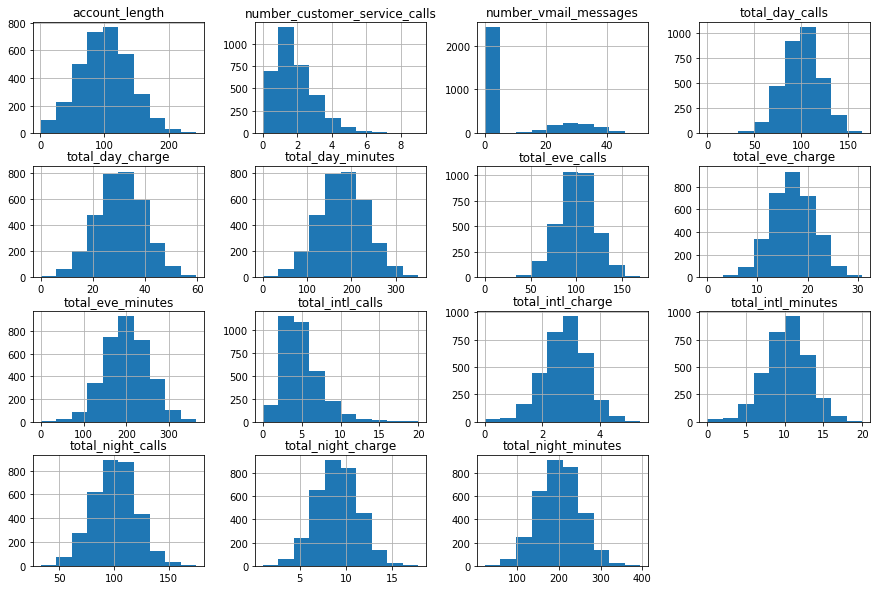

In [14]:
# Histogramas
dataset_train.hist(figsize = (15, 10))
plt.show()

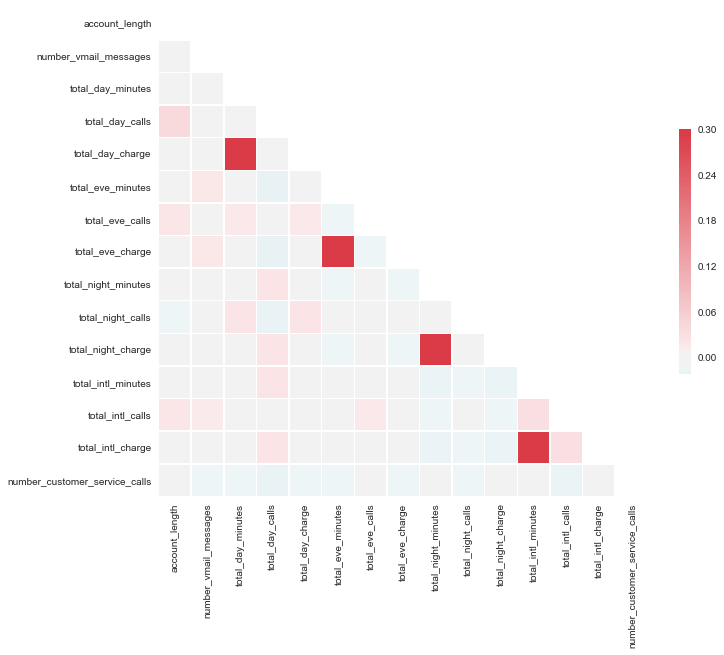

In [17]:
# Gráfico de Correlação
sns.set(style = "white")

# Compute the correlation matrix
corr = dataset_train.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

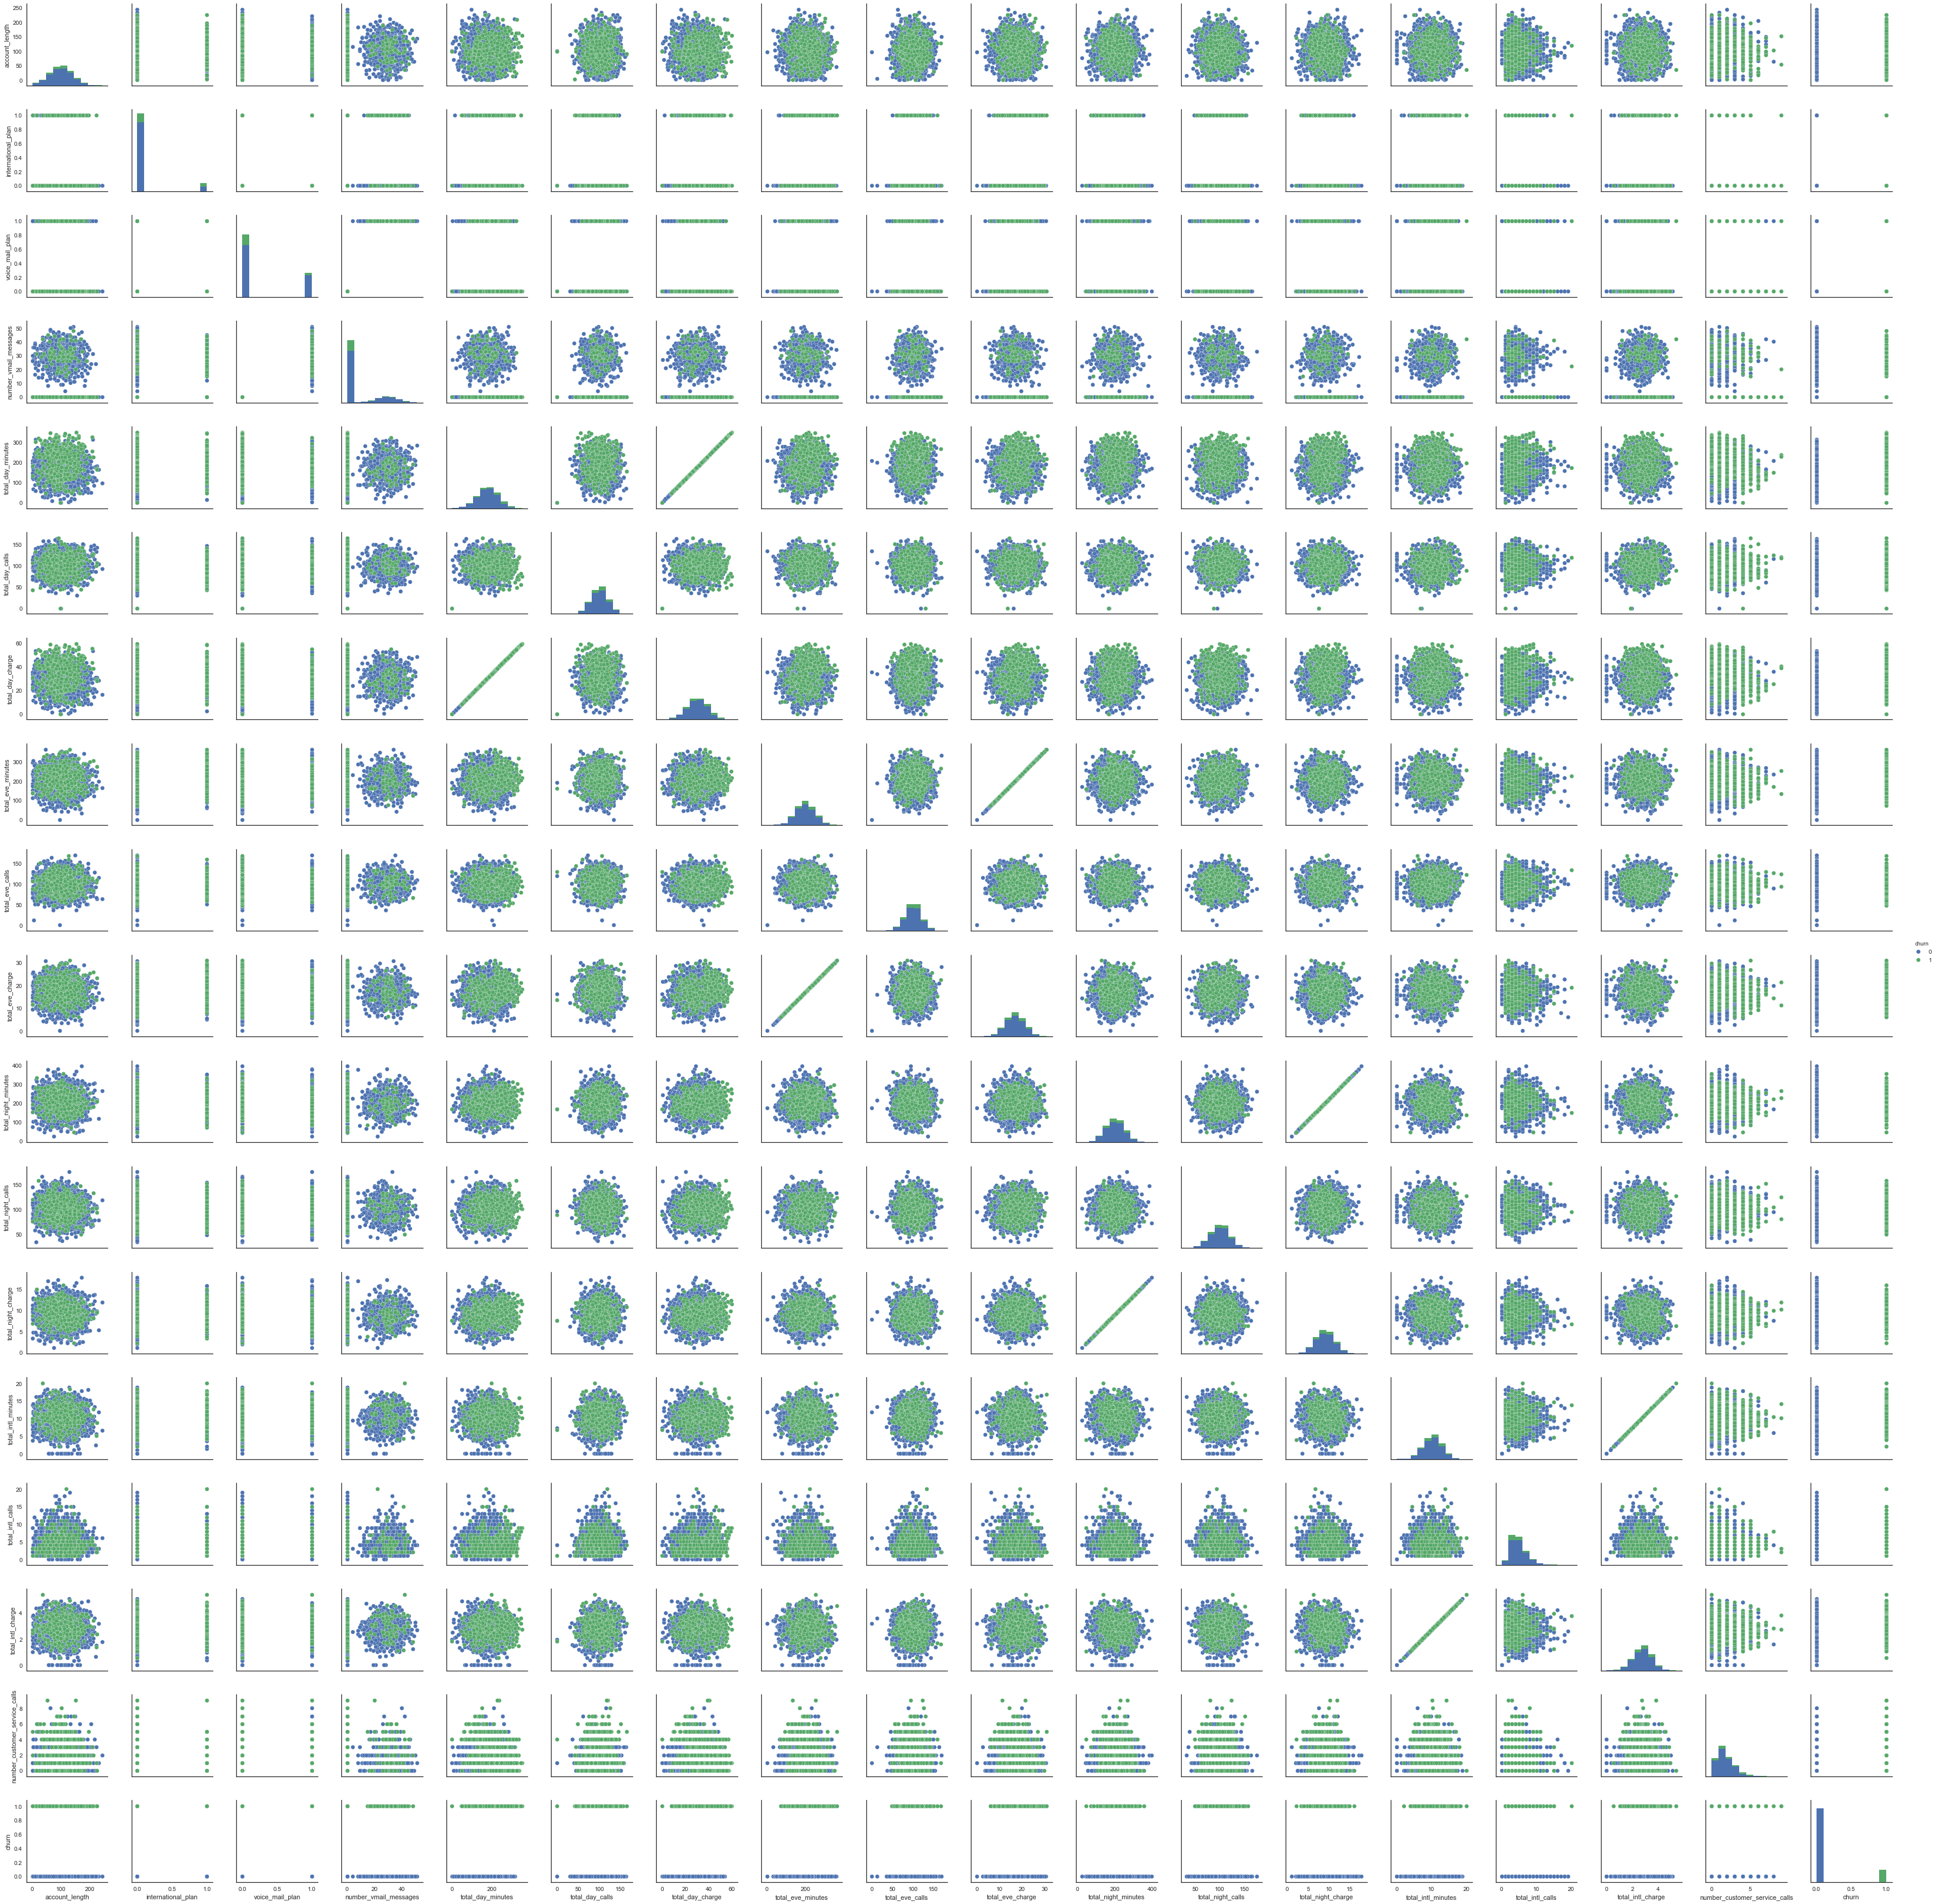

In [19]:
# Pairplot
sns.pairplot(dataset_train, hue = "churn")
plt.show()

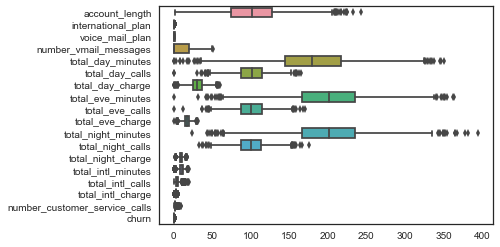

In [20]:
# Boxplot com orientação horizontal
sns.boxplot(data = dataset_train, orient = "h")
plt.show()

### Preparação dos Dados

In [21]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Mudando somente as colunas numéricas
colunas =   ['account_length','number_vmail_messages','number_vmail_messages','total_day_minutes','total_day_calls',
             'total_day_charge', 'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',
             'total_night_calls', 'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge',
             'number_customer_service_calls']

# Dados de treino
df = dataset_train[colunas]
X = df.values

# Dados de teste
df2 = dataset_test[colunas]
X_test = df2.values

# Gerando a nova escala para os dados de treino e teste
scaler = MinMaxScaler(feature_range = (0, 1)).fit(X)

rescaledX = scaler.transform(X)
rescaledX_test = scaler.transform(X_test)

In [22]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Gerando o novo padrão para os dados de treino e teste
scaler = StandardScaler().fit(rescaledX)

standardX = scaler.transform(rescaledX)
standardX_test = scaler.transform(rescaledX_test)

In [23]:
# Adicionando os dados normalizados para o dataset original

# Dados de treino
dataset_train[colunas] = standardX

# Dados de teste
dataset_test[colunas] = standardX_test

dataset_train.head(10)

state  account_length      area_code international_plan voice_mail_plan  \
1     KS        0.676489  area_code_415                  0               1   
2     OH        0.149065  area_code_415                  0               1   
3     NJ        0.902529  area_code_415                  0               0   
4     OH       -0.428590  area_code_408                  1               0   
5     OK       -0.654629  area_code_415                  1               0   
6     AL        0.425335  area_code_510                  1               0   
7     MA        0.500681  area_code_510                  0               1   
8     MO        1.153683  area_code_415                  1               0   
9     LA        0.400220  area_code_408                  0               0   
10    WV        1.002990  area_code_415                  1               1   

    number_vmail_messages  total_day_minutes  total_day_calls  \
1                1.234883           1.566767         0.476643   
2                1.307948          -0.333738         1.124503   
3               -0.591760           1.168304         0.675985   
4               -0.591760           2.196596        -1.466936   
5               -0.591760          -0.240090         0.626149   
6               -0.591760           0.801056        -0.121381   
7                1.161817           0.705572        -0.619735   
8               -0.591760          -0.418205        -1.068253   
9               -0.591760           0.086760        -0.171217   
10               2.111671           1.447412        -0.819076   

    total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1           1.567036          -0.070610        -0.055940         -0.070427   
2          -0.334013          -0.108080         0.144867         -0.107549   
3           1.168464          -1.573383         0.496279         -1.573900   
4           2.196759          -2.742865        -0.608159         -2.743268   
5          -0.240041          -1.038932         1.098699         -1.037939   
6           0.801216           0.386928         0.044463          0.386648   
7           0.705083           2.909300         0.395875          2.908677   
8          -0.418264          -1.930341        -0.306949         -1.931206   
9           0.087242           2.970436        -1.009773          2.971322   
10          1.447141           0.414538         0.546480          0.414490   

    total_night_minutes  total_night_calls  total_night_charge  \
1              0.866743          -0.465494            0.866029   
2              1.058571           0.147825            1.059390   
3             -0.756869           0.198935           -0.755571   
4             -0.078551          -0.567714           -0.078806   
5             -0.276311           1.067803           -0.276562   
6              0.059881           0.914473            0.061821   
7              0.231933           0.914473            0.233209   
8              0.216112          -0.209945            0.215631   
9              0.295216          -0.516604            0.294733   
10             2.482445          -0.158835            2.483233   

    total_intl_minutes  total_intl_calls  total_intl_charge  \
1            -0.085008         -0.601195          -0.085690   
2             1.240482         -0.601195           1.241169   
3             0.703121          0.211534           0.697156   
4            -1.303026          1.024263          -1.306401   
5            -0.049184         -0.601195          -0.045885   
6            -1.410498          0.617898          -1.412550   
7            -0.980610          1.024263          -0.974686   
8            -1.123906          0.617898          -1.120641   
9            -0.550721         -0.194831          -0.550091   
10            0.344880          0.211534           0.338904   

    number_customer_service_calls churn  
1                       -0.427932     0  
2                       -0.427932     0  
3                     

### Feature Selection

In [24]:
# Importância do Atributo com o Extra Trees Classifier

# Separando o array em componentes de input e output
colunas =   ['account_length','number_vmail_messages','international_plan','voice_mail_plan','total_day_minutes',
             'total_day_calls', 'total_day_charge', 'total_eve_minutes','total_eve_calls','total_eve_charge',
             'total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes',
             'total_intl_calls','total_intl_charge', 'number_customer_service_calls', 'churn']

df = dataset_train[colunas]
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:17]
Y = array[:,17]
Y = Y.astype('int')

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier(n_estimators = 50)
modelo.fit(X, Y)

# Print dos Resultados
print(colunas)
print(modelo.feature_importances_)

['account_length', 'number_vmail_messages', 'international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']
[0.0359923  0.02010941 0.07633497 0.01778756 0.13005231 0.03802686
 0.12652998 0.05818733 0.03341961 0.06677542 0.03888916 0.03492468
 0.04149238 0.04685787 0.05735268 0.04811592 0.12915157]


### Ajuste do Modelo

In [25]:
# Acurácia

# Usando as variáveis com importância maior que 0.07 e as variáveis categórias
colunas = ['international_plan','total_day_minutes','total_day_charge', 'number_customer_service_calls', 'churn']
df = dataset_train[colunas]
array = df.values

# Variáveis independentes
X_treino = array[:,0:4]

# Variável dependente
Y_treino = array[:,4]
Y_treino = Y_treino.astype('int')

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression(solver = 'lbfgs')
modelo.fit(X_treino,Y_treino)
           
resultado = model_selection.cross_val_score(modelo, X_treino, Y_treino, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.855 (0.025)


### Previsão

In [26]:
# Aplicando o modelo aos dados de teste

# Usando as variáveis com importância maior que 0.10 e as variáveis categórias
colunas = ['international_plan','total_day_minutes','total_day_charge', 'number_customer_service_calls', 'churn']
df_test = dataset_test[colunas]
array = df_test.values

# Variáveis independentes
X_teste = array[:,0:4]

# Variável dependente
Y_teste = array[:,4]
Y_teste = Y_teste.astype('int')

previsoes = modelo.predict(X_teste)

# A acurácia ficou em 0.86, muito próximo do que conseguimos nos dados de treino
print(accuracy_score(Y_teste, previsoes))
print(confusion_matrix(Y_teste, previsoes))
print(classification_report(Y_teste, previsoes))

# Printando as probabilidades das opções
print(modelo.predict_proba(X_teste))

0.8668266346730654
[[1413   30]
 [ 192   32]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1443
           1       0.52      0.14      0.22       224

   micro avg       0.87      0.87      0.87      1667
   macro avg       0.70      0.56      0.58      1667
weighted avg       0.83      0.87      0.83      1667

[[0.95178589 0.04821411]
 [0.92710948 0.07289052]
 [0.76687737 0.23312263]
 ...
 [0.95622669 0.04377331]
 [0.95121931 0.04878069]
 [0.97587779 0.02412221]]
